In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from random import shuffle
import cv2

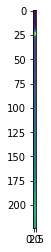

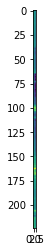

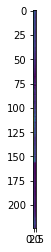

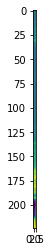

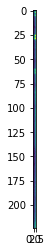

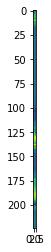

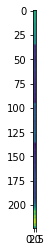

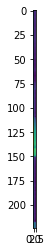

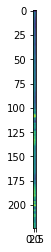

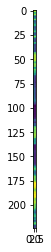

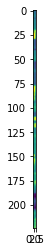

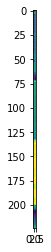

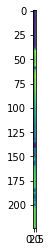

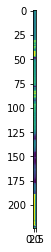

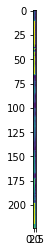

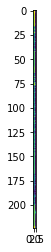

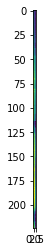

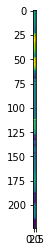

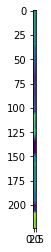

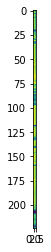

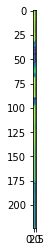

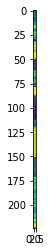

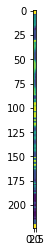

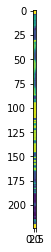

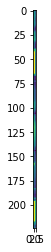

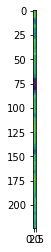

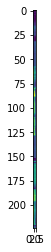

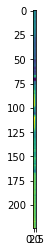

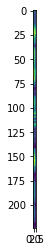

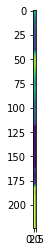

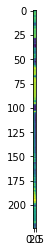

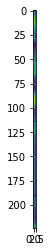

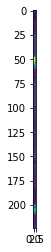

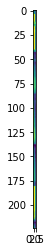

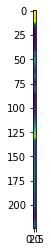

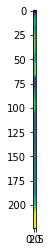

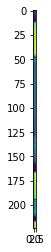

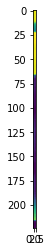

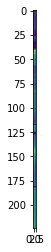

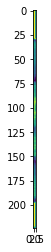

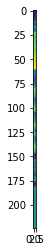

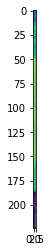

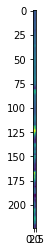

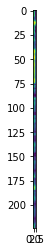

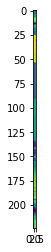

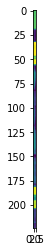

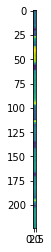

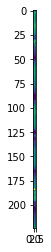

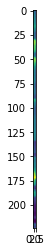

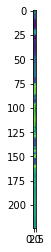

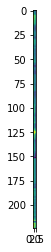

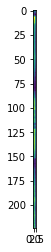

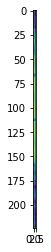

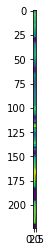

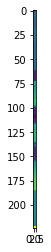

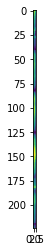

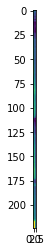

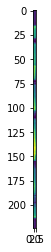

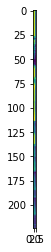

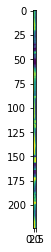

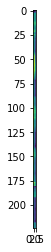

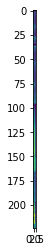

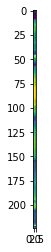

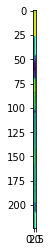

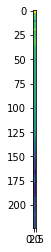

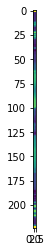

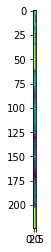

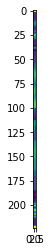

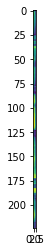

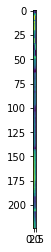

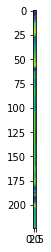

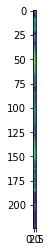

In [59]:
i=0
for img in mangoes:
    i+=1
    plt.imshow(img[i])
    plt.show()


In [18]:
def mangoes():
    X,Y=[],[]
    z=[]
    for img_name in os.listdir('C:/Users/20205231/Downloads/Mangoes/bad'):
        img=cv2.imread(os.path.join('C:/Users/20205231/Downloads/Mangoes/bad',img_name))
        img=cv2.resize(img,(224,224))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        z.append([img,0])
    for img_name in os.listdir('C:/Users/20205231/Downloads/Mangoes/good'):
        img=cv2.imread(os.path.join('C:/Users/20205231/Downloads/Mangoes/good',img_name))
        img=cv2.resize(img,(224,224))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        z.append([img,1])
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [19]:
mangoes,outmangoes=mangoes()
outmangoes=np.array(outmangoes)
mangoes=np.array(mangoes)
mangoes=mangoes/255

100%|██████████| 72/72 [00:00<00:00, 68587.30it/s]


In [74]:
indices=np.random.choice(range(len(outmangoes)),size=int(len(outmangoes)*0.3),replace=False)
X2=mangoes[indices]
y2=outmangoes[indices]


In [4]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]

    for img_name in os.listdir('C:/Users/20205231/Downloads/6ps7gtp2wg-1/FRUIT-16K/S_Mango'):
        img=cv2.imread(os.path.join('C:/Users/20205231/Downloads/6ps7gtp2wg-1/FRUIT-16K/S_Mango',img_name))
        img=cv2.resize(img,(224,224))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        z.append([img,0])
    for img_name in os.listdir('C:/Users/20205231/Downloads/6ps7gtp2wg-1/FRUIT-16K/F_Mango'):
        img=cv2.imread(os.path.join('C:/Users/20205231/Downloads/6ps7gtp2wg-1/FRUIT-16K/F_Mango',img_name))
        img=cv2.resize(img,(224,224))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        z.append([img,1])
        
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [5]:
X,Y=load_rottenvsfresh()
Y=np.array(Y)
X=np.array(X)
X=X/255

y_ser=pd.Series(Y)
y_ser.value_counts()

100%|██████████| 2017/2017 [00:00<00:00, 504466.97it/s]

Shuffling your data.....


1    1017
0    1000
dtype: int64

In [75]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

X_train=np.concatenate((X_train,X2))
y_train=np.append(y_train,y2)

In [7]:
import tensorflow as tf 
import keras 
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D
from keras.models import Sequential
#from keras.optimizers import Adam, RMSprop

In [111]:
model = Sequential()

model.add(SeparableConv2D(32, (11, 11),strides=5, activation='relu', input_shape=(100,100,3)))
#model.add(MaxPooling2D((3, 3)))
model.add(SeparableConv2D(32, (5, 5), activation='relu',strides=3))
#model.add(MaxPooling2D((3,3)))
#model.add(BatchNormalization())

model.add(SeparableConv2D(64, (3, 3), activation='relu'))
model.add(SeparableConv2D(64, (2, 2), activation='relu'))
model.add(SeparableConv2D(64, (1, 1), activation='relu'))
#model.add(SeparableConv2D(64, (3, 3),  padding='same', activation='relu'))
#model.add(MaxPooling2D((3,3)))


model.add(Flatten())

model.add(Dense(500, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

print(model.summary())

model.compile(loss=keras.losses.binary_crossentropy, optimizer = tf.optimizers.Adam(lr = 0.001), metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_29 (Separa  (None, 43, 43, 32)       491       
 bleConv2D)                                                      
                                                                 
 separable_conv2d_30 (Separa  (None, 13, 13, 32)       1856      
 bleConv2D)                                                      
                                                                 
 separable_conv2d_31 (Separa  (None, 11, 11, 64)       2400      
 bleConv2D)                                                      
                                                                 
 separable_conv2d_32 (Separa  (None, 10, 10, 64)       4416      
 bleConv2D)                                                      
                                                                 
 separable_conv2d_33 (Separa  (None, 10, 10, 64)      

In [86]:
model = Sequential()

model.add(SeparableConv2D(32, (22, 22),strides=5, activation='relu', input_shape=(224,224,3)))
#model.add(MaxPooling2D((3, 3)))
model.add(SeparableConv2D(32, (10, 10), activation='relu',strides=3))
#model.add(MaxPooling2D((3,3)))
#model.add(BatchNormalization())

model.add(SeparableConv2D(64, (6, 6), activation='relu'))
model.add(SeparableConv2D(64, (4, 4), activation='relu'))
model.add(SeparableConv2D(64, (2, 2), activation='relu'))
#model.add(SeparableConv2D(64, (3, 3),  padding='same', activation='relu'))
#model.add(MaxPooling2D((3,3)))


model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

model.compile(loss=keras.losses.binary_crossentropy, optimizer = tf.optimizers.Adam(lr = 0.001), metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_20 (Separa  (None, 41, 41, 32)       1580      
 bleConv2D)                                                      
                                                                 
 separable_conv2d_21 (Separa  (None, 11, 11, 32)       4256      
 bleConv2D)                                                      
                                                                 
 separable_conv2d_22 (Separa  (None, 6, 6, 64)         3264      
 bleConv2D)                                                      
                                                                 
 separable_conv2d_23 (Separa  (None, 3, 3, 64)         5184      
 bleConv2D)                                                      
                                                                 
 separable_conv2d_24 (Separa  (None, 2, 2, 64)        

In [87]:
history=model.fit(X_train, y_train,batch_size=32,validation_data=(X_test,y_test),epochs= 50)
                 #callbacks=[check_point])

Epoch 1/50
43/43 [==============================] - 16s 347ms/step - loss: 0.6933 - accuracy: 0.4847 - val_loss: 0.6935 - val_accuracy: 0.4910
Epoch 2/50
43/43 [==============================] - 14s 336ms/step - loss: 0.6925 - accuracy: 0.5233 - val_loss: 0.6902 - val_accuracy: 0.5135
Epoch 3/50
43/43 [==============================] - 15s 346ms/step - loss: 0.6930 - accuracy: 0.5073 - val_loss: 0.6901 - val_accuracy: 0.4910
Epoch 4/50
43/43 [==============================] - 15s 346ms/step - loss: 0.6772 - accuracy: 0.5948 - val_loss: 0.6595 - val_accuracy: 0.6066
Epoch 5/50
43/43 [==============================] - 15s 346ms/step - loss: 0.6277 - accuracy: 0.6603 - val_loss: 0.6213 - val_accuracy: 0.6697
Epoch 6/50
43/43 [==============================] - 15s 344ms/step - loss: 0.6055 - accuracy: 0.6778 - val_loss: 0.5778 - val_accuracy: 0.6847
Epoch 7/50
43/43 [==============================] - 15s 352ms/step - loss: 0.6089 - accuracy: 0.6516 - val_loss: 0.5864 - val_accuracy: 0.6832

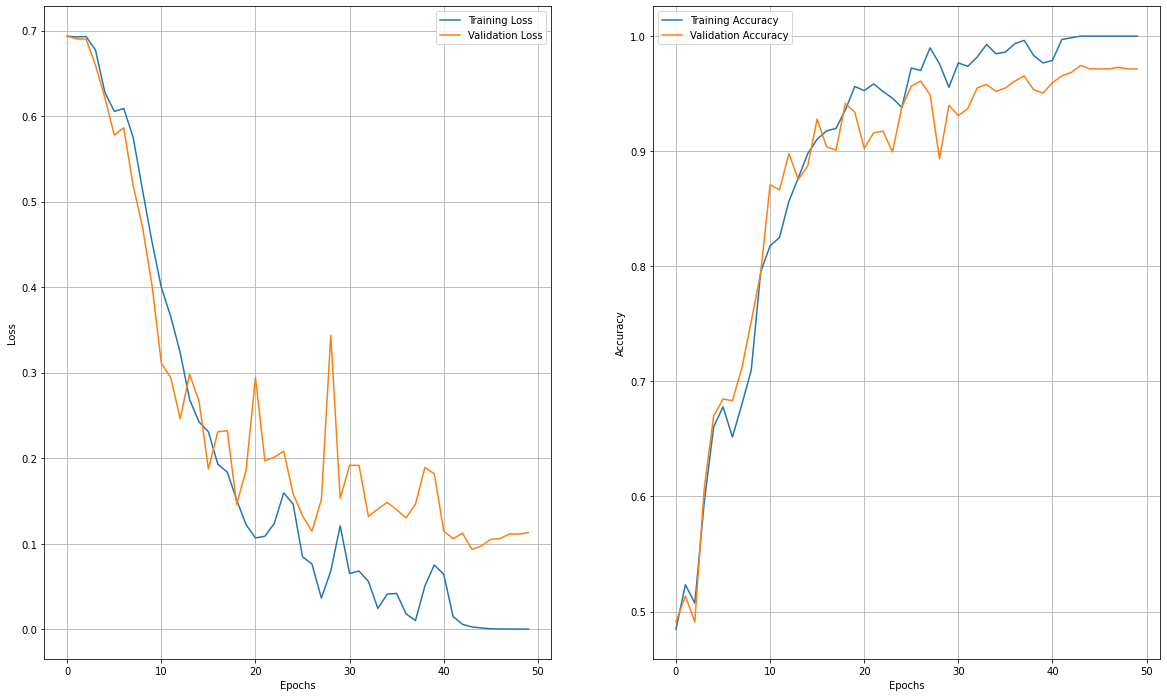

In [88]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [89]:
model.evaluate(X_test,y_test)

21/21 [==============================] - 1s 69ms/step - loss: 0.1132 - accuracy: 0.9715


[0.11319532245397568, 0.9714714884757996]

In [91]:
x=mangoes[~indices]
y=outmangoes[~indices]
model.evaluate(x,y)

#x=mangoes[indices]
#y=outmangoes[indices]
#model.evaluate(x,y)

1/1 [==============================] - 0s 71ms/step - loss: 6.2195 - accuracy: 0.8095


[6.219544410705566, 0.8095238208770752]

In [81]:
pred=model.predict(x)
print(pred)

[[1.0000000e+00]
 [5.9842318e-02]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9998462e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [3.0606526e-01]
 [1.0000000e+00]
 [2.2781461e-02]
 [1.0000000e+00]
 [2.9367208e-04]]


In [82]:
#0 bad, 1 good
pred2=np.round(pred,0).reshape(1,-1)[0]
print(tf.math.confusion_matrix(pred2,y))

tf.Tensor(
[[ 1  3]
 [ 3 14]], shape=(2, 2), dtype=int32)


[1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


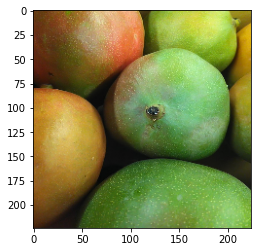

good


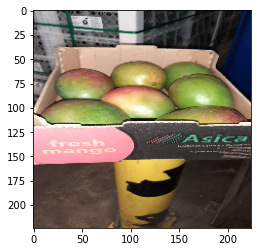

good


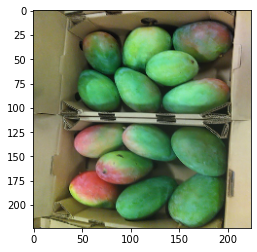

good


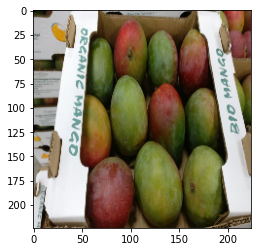

good


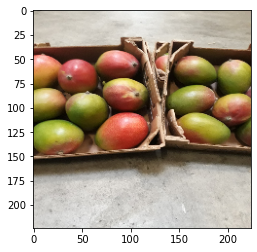

good


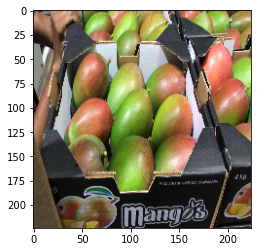

good


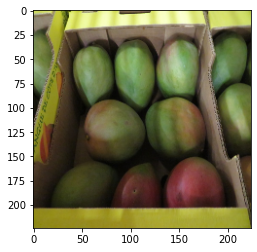

good


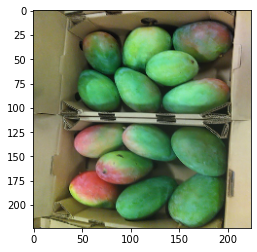

good


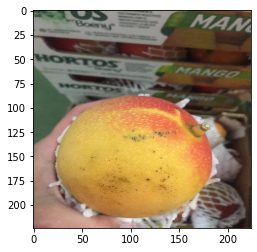

good


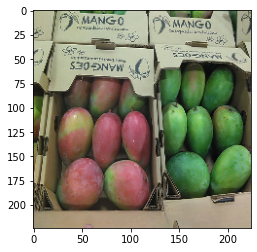

good


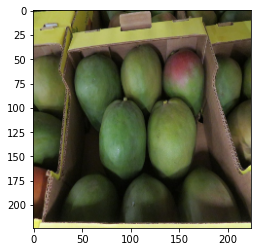

good


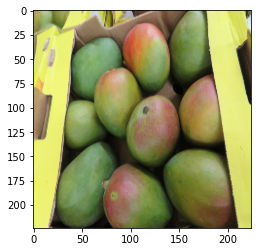

good


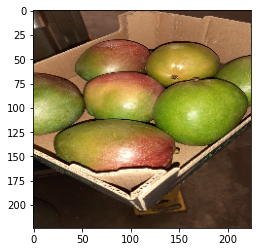

good


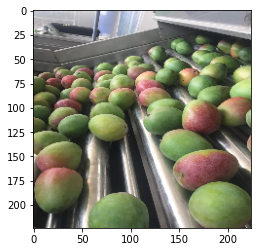

good


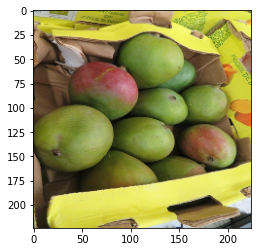

good


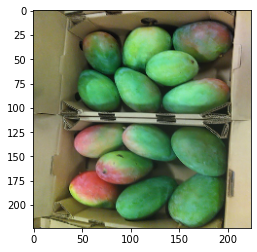

good


In [72]:

print(pred2)
print(outmangoes)
for i in range(len(pred2)):
    if pred2[i]==y[i]:
        plt.imshow(x[i])
        plt.show()
        if pred2[i]==0:
            print('bad')
        else:
            print('good')

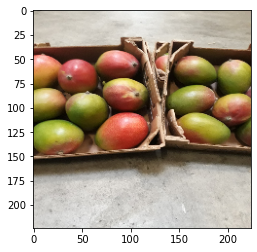

output bad


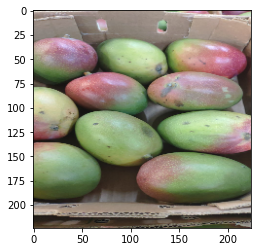

output good


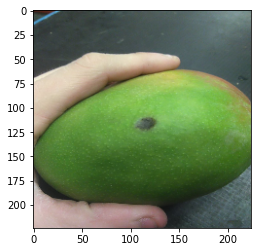

output good


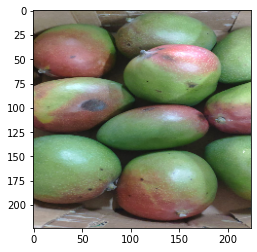

output good


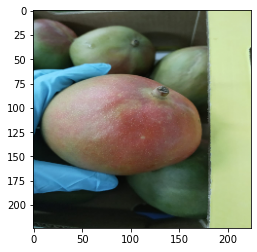

output bad


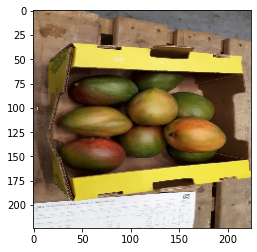

output bad


In [84]:
for i in range(len(pred2)):
    if pred2[i]!=y[i]:
        plt.imshow(x[i])
        plt.show()
        if pred2[i]==0:
            print('output bad')
        else:
            print('output good')